<a href="https://colab.research.google.com/github/vchibilisco/ejemplos-IA/blob/master/red_neuronal/Normalizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy
import matplotlib.pyplot as plt
import copy

[[100.   1.]
 [150.   1.]
 [200.   2.]
 [230.   3.]
 [235.   3.]
 [250.   2.]
 [330.   3.]]
WIL.shape
(3, 3)
WOL.shape
(1, 4)


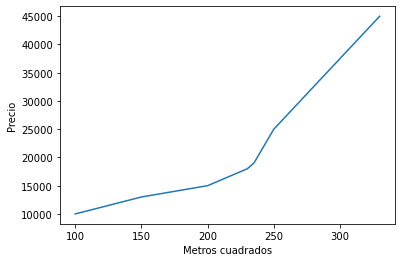

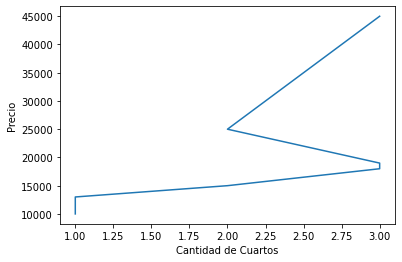

In [2]:
input_layer = 3
output_layer = 1
#Ejemplo precio de casas basado en m2

# 100m2 , 1c, $10000
# 150m2 , 1c, $13000
# 200m2 , 2c, $15000
# 230m2 , 3c, $18000
# 235m2 , 3c, $19000
# 250m2 , 2c, $25000
# 330m2 , 3c, $45000

# Definir X
X = numpy.array([
     [100, 1],
     [150, 1],
     [200, 2],
     [230, 3],
     [235, 3],
     [250, 2],
     [330, 3],
], dtype=float)
print(X)
# Definir Y
Y = numpy.array([
     10000,
     13000,
     15000,
     18000,
     19000,
     25000,
     45000
])

# Definir W: cantidad de caracteristicas + 1
wn1 = numpy.array([numpy.random.rand(
    numpy.size(X,1) + 1
)])

wn2 = numpy.array([numpy.random.rand(
    numpy.size(X,1) + 1
)])

wn3 = numpy.array([numpy.random.rand(
    numpy.size(X,1) + 1
)])

WIL = numpy.append(wn1, wn2, axis=0)
WIL = numpy.append(WIL, wn3, axis=0)
print('WIL.shape')
print(WIL.shape)


WOL = numpy.array([numpy.random.rand(
    input_layer + 1
)])
print('WOL.shape')
print(WOL.shape)

plt.plot(X[:,0], Y[:])
plt.ylabel('Precio')
plt.xlabel('Metros cuadrados')
plt.show()

plt.plot(X[:,1], Y[:])
plt.ylabel('Precio')
plt.xlabel('Cantidad de Cuartos')
plt.show()

In [3]:
def layer(X, W, f_act):
  arregloDeUnos = numpy.array(
    numpy.ones(
        (numpy.size(X,0),1),
        dtype=int
        )
  )
  X_red = numpy.append(arregloDeUnos, X, axis=1)

  X_transpuesta = X_red.transpose()

  z = numpy.matmul(W, X_transpuesta)
  
  a = f_act(z)
  return a

In [4]:
def neurona(X, W):
  arregloDeUnos = numpy.array(
    numpy.ones(
        (numpy.size(X,0),1),
        dtype=int
        )
  )
  X_red = numpy.append(arregloDeUnos, X, axis=1)

  X_transpuesta = X_red.transpose()

  z = numpy.matmul(W, X_transpuesta)
  return z

In [5]:
def sigmoid(x):
  return 1/(1 + numpy.exp(-x))

def lineal(x):
  return x

In [6]:
def cost(pred, Y):
  m = len(Y)

  diff = (pred - Y) ** 2

  J = (1/(2 * m)) * numpy.sum(diff)
  return J

In [8]:
def estandarizar(X):
  X_norm = copy.deepcopy(X)
  sigma = numpy.std(X, axis=0)
  mu = numpy.mean(X, axis=0)

  max = numpy.size(X, axis=1)
  i = 0

  while i < max:
    X_norm[:,i] = (X[:,i] - mu[i]) / sigma[i]
    i = i + 1

  return X_norm

def normalizar(X):
  X_norm = copy.deepcopy(X)
 
  length = numpy.size(X, axis=1)
  i = 0

  # y = (x - min) / (max - min)
  while i < length:
    X_norm[:,i] = (X[:,i] - numpy.min(X[:,i])) / (numpy.max(X[:,i]) - numpy.min(X[:,i]) )
    i = i + 1

  return X_norm

print(X)
print(estandarizar(X))
print(normalizar(X))

[[100.   1.]
 [150.   1.]
 [200.   2.]
 [230.   3.]
 [235.   3.]
 [250.   2.]
 [330.   3.]]
[[-1.66076123 -1.37198868]
 [-0.92960849 -1.37198868]
 [-0.19845574 -0.17149859]
 [ 0.2402359   1.02899151]
 [ 0.31335118  1.02899151]
 [ 0.532697   -0.17149859]
 [ 1.70254139  1.02899151]]
[[0.         0.        ]
 [0.2173913  0.        ]
 [0.43478261 0.5       ]
 [0.56521739 1.        ]
 [0.58695652 1.        ]
 [0.65217391 0.5       ]
 [1.         1.        ]]


In [9]:
X_norm = normalizar(X)
print(X_norm)
salida_input_layer = layer(X, WIL, sigmoid)

print("salida_input_layer")
print(salida_input_layer.shape)
print(salida_input_layer)

salida_output_layer = layer(salida_input_layer.transpose(), WOL, lineal)
print("salida_output_layer")
print(salida_output_layer.shape)
print(salida_output_layer)


[[0.         0.        ]
 [0.2173913  0.        ]
 [0.43478261 0.5       ]
 [0.56521739 1.        ]
 [0.58695652 1.        ]
 [0.65217391 0.5       ]
 [1.         1.        ]]
salida_input_layer
(3, 7)
[[1.         1.         1.         1.         1.         1.
  1.        ]
 [1.         1.         1.         1.         1.         1.
  1.        ]
 [0.99972365 0.99999214 0.99999991 1.         1.         1.
  1.        ]]
salida_output_layer
(1, 7)
[[2.3285934  2.32865566 2.32865746 2.32865748 2.32865748 2.32865748
  2.32865748]]


In [10]:
cost(salida_output_layer, Y)

273451766.32983375